In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# SPDR ETFs
assets = [
    'XLC',  # Communication Services
    'XLY',  # Consumer Discretionary
    'XLP',  # Consumer Staples
    'XLE',  # Energy
    'XLF',  # Financials
    'XLV',  # Health Care
    'XLI',  # Industrials
    'XLB',  # Materials
    'XLRE', # Real Estate
    'XLK',  # Technology
    'XLU',  # Utilities
    'SPY',  # S&P 500
]

# Download data from Yahoo Finance since 2018-06-19 (when all ETFs are available)
start = '2018-06-19'
data = {}
for ticker in assets:
    data[ticker] = yf.download(ticker, start=start)

# Calculate daily returns
returns = pd.DataFrame()
for ticker in assets:
    returns[ticker] = data[ticker]['Adj Close'].pct_change().iloc[1:]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


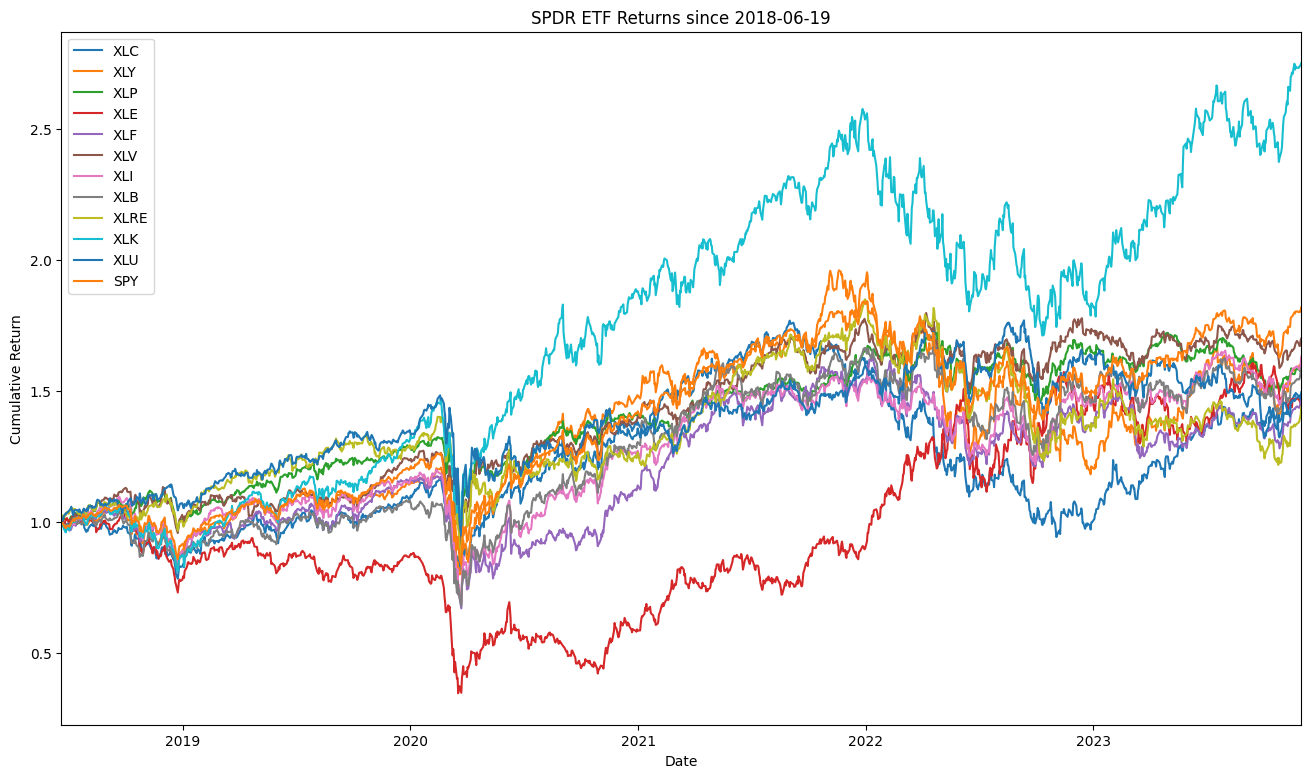

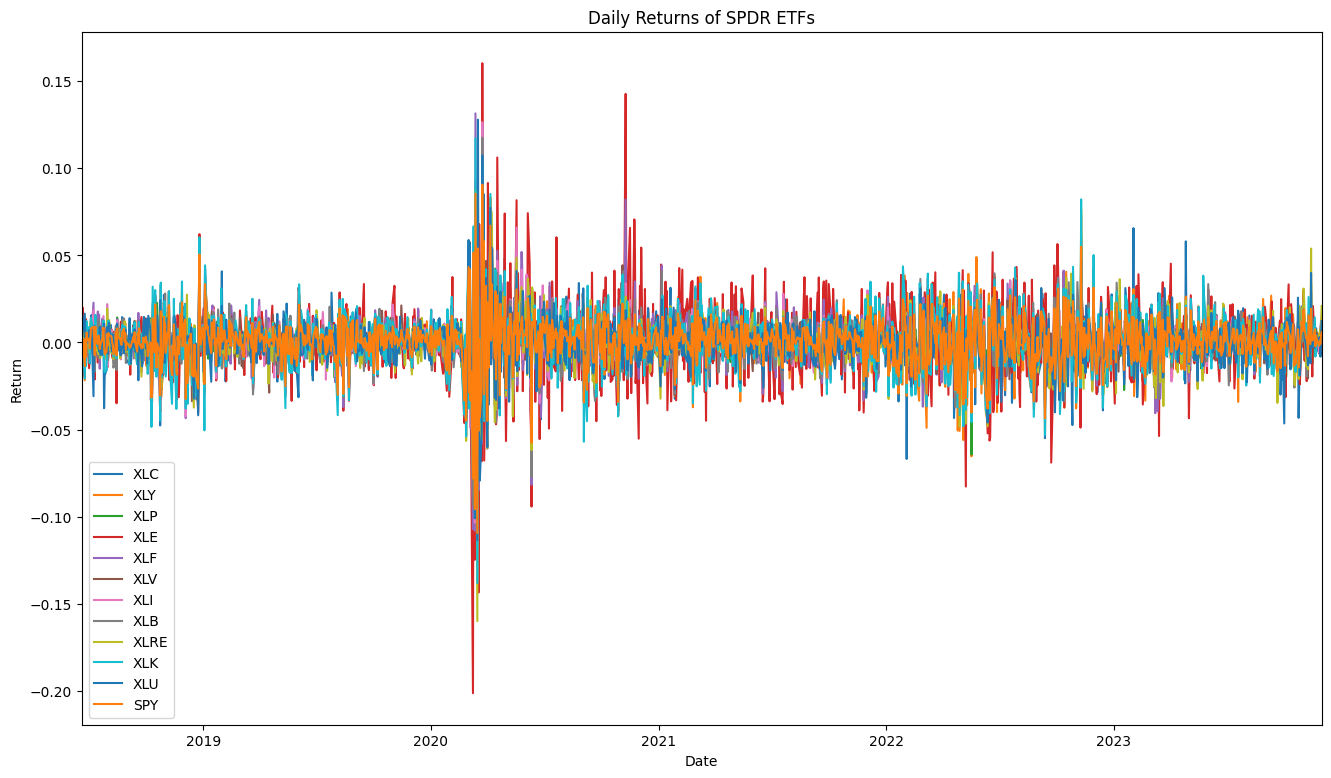

In [3]:
# Graph the cumulative returns
fig = px.line()
for ticker in assets:
    fig.add_scatter(x=returns.index, y=(returns[ticker]+1).cumprod(), name=ticker)
fig.update_layout(title='SPDR ETF Returns since 2018-06-19',
                  xaxis_title='Date',
                  yaxis_title='Cumulative Return')
fig.show()

# Graph the returns
fig = px.line()
for ticker in assets:
    fig.add_scatter(x=returns.index, y=returns[ticker], name=ticker)
fig.update_layout(title='Daily Returns of SPDR ETFs',
                  xaxis_title='Date',
                  yaxis_title='Return')
fig.show()

# Graph both using matplotlib
fig, ax = plt.subplots(figsize=(16, 9))
for ticker in assets:
    ax.plot(returns.index, (returns[ticker]+1).cumprod(), label=ticker)
ax.legend()
ax.set_title('SPDR ETF Returns since 2018-06-19')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.margins(x=0)
plt.show()

fig, ax = plt.subplots(figsize=(16, 9))
for ticker in assets:
    ax.plot(returns.index, returns[ticker], label=ticker)
ax.legend()
ax.set_title('Daily Returns of SPDR ETFs')
ax.set_xlabel('Date')
ax.set_ylabel('Return')
ax.margins(x=0)
plt.show()

In [4]:
def optimal_portfolio(m, sigma, mu_b):
    '''
    m: row vector of expected returns
    sigma: covariance matrix of returns
    mu_b: expected portfolio return
    
    Returns the weights and variance of the minimum variance portfolio
    '''
    m = np.matrix(m).T
    sigma = np.matrix(sigma)
    e = np.matrix(np.ones(len(m))).T
    sigma_inv = sigma.I
    # Calculate the minimum variance and market porfolio weights
    w_min_var = (sigma_inv * e) / (e.T * sigma_inv * e)
    w_mk = (sigma_inv * m) / (e.T * sigma_inv * m)
    # Calculate the return-constrained minimum variance portfolio
    v = w_mk - w_min_var
    alpha = ((mu_b - m.T * w_min_var) / (m.T * v))[0, 0]
    w = w_min_var + alpha * v
    return w.T[0].tolist()[0], w.T * sigma * w

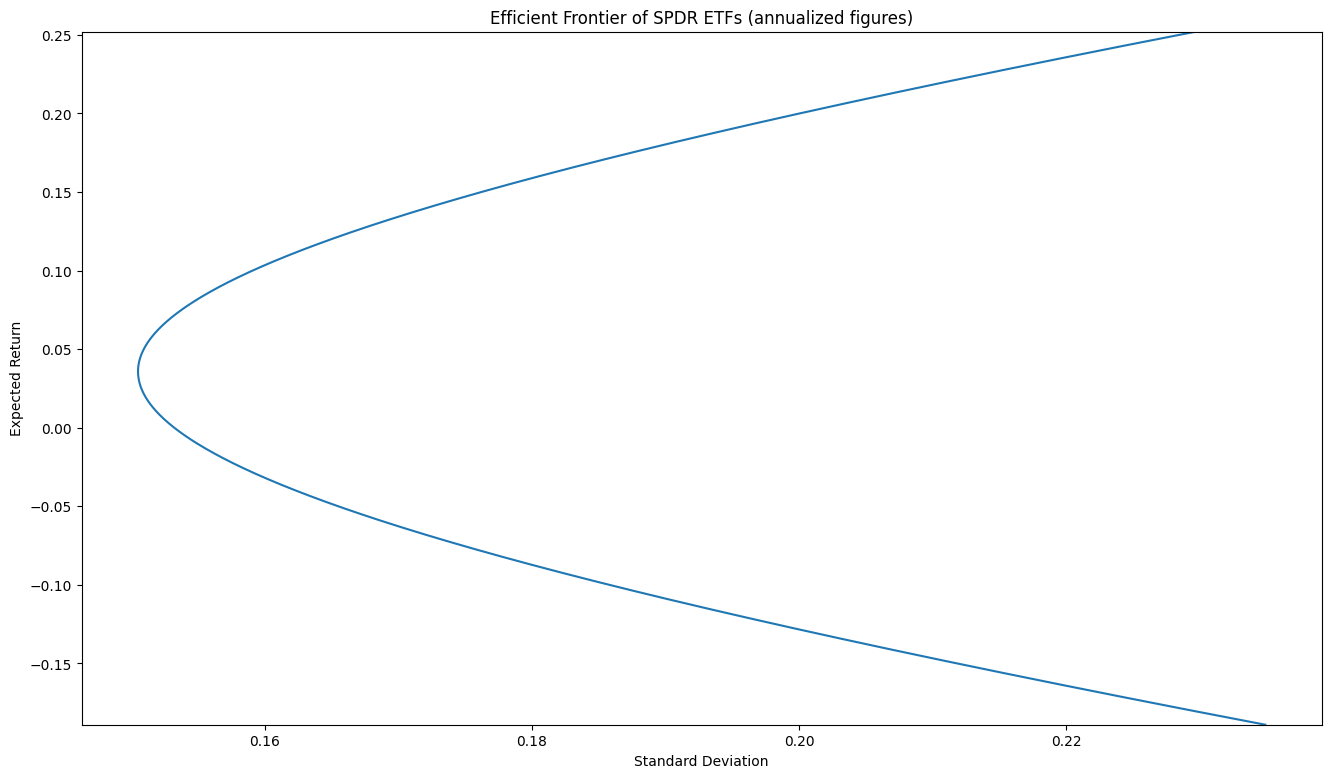

In [5]:
# Calculate the mean and covariance matrix of returns
m = returns.mean()
sigma = returns.cov()

# Graph the efficient frontier 
means = np.linspace(-0.00075, 0.001, 1000)
variances = np.vectorize(lambda mu: optimal_portfolio(m, sigma, mu)[1])(means)
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(np.sqrt(variances*252), means*252)
ax.set_title('Efficient Frontier of SPDR ETFs (annualized figures)')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Expected Return')
ax.margins(y=0)
plt.show()